<a href="https://colab.research.google.com/github/IBREEZZ/Code_Academy_Makeen2/blob/main/Basic_Inferential_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Split data by test preparation course completion
completed = df[df['test preparation course'] == 'completed']
none = df[df['test preparation course'] == 'none']

# Hypothesis test for Math Score
stat_math, p_math = ttest_ind(completed['math score'], none['math score'], equal_var=False)

# Hypothesis test for Reading Score
stat_reading, p_reading = ttest_ind(completed['reading score'], none['reading score'], equal_var=False)

# Hypothesis test for Writing Score
stat_writing, p_writing = ttest_ind(completed['writing score'], none['writing score'], equal_var=False)

# Output
print("Math: t = %.3f, p = %.4f" % (stat_math, p_math))
print("Reading: t = %.3f, p = %.4f" % (stat_reading, p_reading))
print("Writing: t = %.3f, p = %.4f" % (stat_writing, p_writing))


Math: t = 5.787, p = 0.0000
Reading: t = 8.004, p = 0.0000
Writing: t = 10.753, p = 0.0000


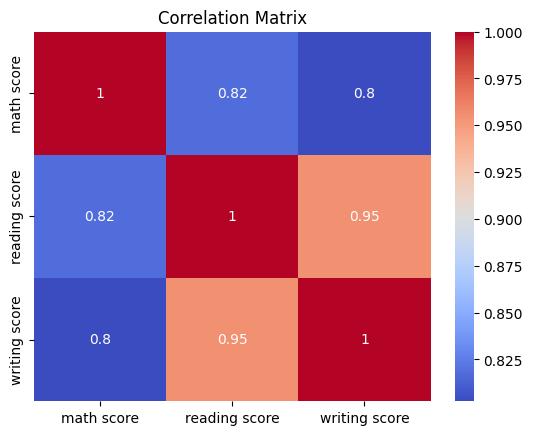

In [2]:
# Correlation matrix
corr = df[['math score', 'reading score', 'writing score']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the data
df = pd.read_csv("StudentsPerformance.csv")

# Rename columns (this is KEY to avoid spaces in column names)
df = df.rename(columns={
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score',
    'test preparation course': 'test_preparation'
})

# Now map the encoded values to the test_preparation column
df['test_preparation'] = df['test_preparation'].map({'none': 0, 'completed': 1})

# Build regression model
model = smf.ols('math_score ~ reading_score + test_preparation', data=df).fit()

# Show results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1007.
Date:                Sun, 11 May 2025   Prob (F-statistic):          5.32e-240
Time:                        10:52:36   Log-Likelihood:                -3584.7
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     997   BIC:                             7190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.2292      1.343  